<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">ĐỒ ÁN THỰC HÀNH</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">| Bộ môn: Nhập môn Khoa học Dữ liệu |</div>

# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">PHẦN 2. MÔ HÌNH HÓA DỮ LIỆU</div>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:newtimeroman; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Mục lục 📝</b></h3>
    
   * [I. Bài toán đặt ra](#1)
        
   * [II. Tiền xử lý dữ liệu](#2)
        - [1. Loại những thuộc tính không có ý nghĩa cho việc mô hình hóa](#2.1)
        - [2. Chuyển đổi các cột không phải dạng số về dạng số](#2.2)
        - [3. Tính correlations và tiếp tục chọn những thuộc tính thật sự có giá trị](#2.3)
        - [4. Xử lý các giá trị NaN](#2.4)

   * [III. Xây dựng mô hình học máy](#3)
        - [1. Hồi quy tuyến tính đơn biến (Univariable Linear Regression)](#3.1)
        - [2. Hồi quy tuyến tính đa biến (Linear Regression with Multi Variables)](#3.2)
        - [3. Đánh giá mô hình (Evaluation)](#3.3)
        - [4. Hồi quy đa thức (Polynomial Regression) đơn giản với đơn biến](#3.4)
        - [5. Tổng kết](#3.5)

<a id="1"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">I. Bài toán đặt ra</div>

 **<span style='color:#2B9C15'>💬 Tên bài toán </span>** 
 
 Dự đoán giá bán căn hộ chung cư
 
 **<span style='color:#2B9C15'>💬 Giới thiệu chung </span>**

- Trong học máy, **học có giám sát** là một nhóm các thuật toán phổ biến trong lĩnh vực này và một trong những vấn đề quan trọng của học có giám sát là hồi quy(regression). Hồi quy là các bài toán liên quan đến việc dự đoán đầu ra có giá trị liên tục (predicting continous valued output).
- Và trong bài toán mà nhóm đề ra thì từ những cột thuộc tính đầu vào như diện tích căn hộ, số phòng ngủ, số phòng vệ sinh,.... Nhóm tiến hành dự đoán cột mục tiêu là giá bán của chung cư bằng thuật toán hồi quy tuyến tính (linear regression).

<a id="2"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">II. Tiền xử lý dữ liệu</div>

👉 Trước tên ta cần import và cài đặt một số thư viện cần thiết.

In [85]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

sns.set_style("white")
sns.set(rc={"axes.facecolor":"#F2EAC5","figure.facecolor":"#F2EAC5"})
sns.set_context("poster",font_scale = .7)

👉 Tiếp đến đọc file `house.csv` (file đã được tiền xử lý ở phần Khám phá dữ liệu) vào dataframe `house_df` và in ra 3 dòng đầu tiên của dataframe.

In [86]:
house_df = pd.read_csv('house.csv')
house_df.head(3)

,Unnamed: 0,DiaChi,GiaBan,DuAn,DienTich,TinhTrangBDS,Gia/m2,PhongNgu,PhongVeSinh,SoTang,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,DacDiem,Quan
0,0,"Đường Huy Cận, Phường Phước Long B (Quận 9 cũ)...",2.35,The Art,66.0,Chưa bàn giao,35.61,2.0,2.0,8.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,NaN,Thành phố Thủ Đức
1,1,"số 88, số 88 Đường N1, Phường Sơn Kỳ, Quận Tân...",3.42,Celadon City,71.0,Đã bàn giao,48.17,2.0,2.0,NaN,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,NaN,Quận Tân Phú
2,2,"Võ Văn Kiệt, Phường An Lạc, Quận Bình Tân, Tp ...",2.40,Akari City,56.0,Đã bàn giao,42.86,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Quận Bình Tân


<a id="2.1"></a>
### <span style='color:#2B9C15'>1. Loại những thuộc tính không có ý nghĩa cho việc mô hình hóa </span>

💡 **Một số nhận xét và quyết định**

- Như đã quan sát ở phần khám phá dữ liệu: Cột `DiaChi` và `DuAn` chứa các giá trị quá riêng biệt, không có ý nghĩa cho việc trực quan hay phân tích do đó các cột này sẽ không được lựa chọn làm thuộc tính đầu vào.
- Cột `SoTang` thể hiện tầng mà căn hộ tọa lạc trong chung cư, cũng không được lấy do không có nhiều ý nghĩa.
- Do cột `Gia/m2` thật ra được tính bằng cách `GiaBan`/`DienTich` nên cũng không có giá trị cho bài toán.
- Hầu như cột `DacDiem` của bộ dữ liệu là nan hoặc 'căn góc' do đó cũng có thể loại bỏ thuộc tính này.
- Các cột của bộ dữ liệu được giữ lại bao gồm: `GiaBan`, `DienTich`, `TinhTrangBDS`, `PhongNgu`, `PhongVeSinh`, `TinhTrangGiayTo`, `TinhTrangNoiThat`, `HuongCua`, `HuongBanCong`, `Quan`.
- **Đây là bước loại những thuộc tính có thể thấy ngay về mặt ý nghĩa, sau khi hoàn thành các bước tiền xử lý tiếp theo sẽ thực hiện tính `correlation` (hệ số tương quan) giữa từng thuộc tính với biến đầu ra để có thể đưa ra những lựa chọn chính xác hơn nữa.**

👉 Thực hiện lọc ra những cột cần thiết cho bài toán và lưu vào dataframe mới `new_df`.

In [87]:
new_df=house_df[['GiaBan', 'DienTich', 'TinhTrangBDS', 'PhongNgu', 'PhongVeSinh', 'TinhTrangGiayTo',
                 'TinhTrangNoiThat', 'HuongBanCong', 'HuongCua', 'Quan']]
new_df.head()

,GiaBan,DienTich,TinhTrangBDS,PhongNgu,PhongVeSinh,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,Quan
0,2.35,66.0,Chưa bàn giao,2.0,2.0,Đã có sổ,Nội thất cao cấp,Tây Bắc,Đông Bắc,Thành phố Thủ Đức
1,3.42,71.0,Đã bàn giao,2.0,2.0,Đang chờ sổ,Nội thất cao cấp,NaN,NaN,Quận Tân Phú
2,2.40,56.0,Đã bàn giao,2.0,NaN,NaN,NaN,NaN,NaN,Quận Bình Tân
3,7.50,107.0,Đã bàn giao,3.0,NaN,NaN,NaN,NaN,NaN,Thành phố Thủ Đức
4,3.10,75.0,Chưa bàn giao,2.0,2.0,NaN,NaN,NaN,NaN,Quận Bình Tân


👉 Từ bước này, chúng ta sẽ sử dụng `new_df` xuyên suốt quá trình thực hiện bài toán.

<a id="2.2"></a>
### <span style='color:#2B9C15'>2. Chuyển đổi các cột không phải dạng số về dạng số </span>

👉 Chuyển các cột `TinhTrangBDS`, `TinhTrangGiayTo`, `TinhTrangNoiThat`, `HuongBanCong`, `HuongCua`, `Quan` về dạng số để làm đầu vào cho mô hình học máy, tuy nhiên các cột có dạng số này vẫn mang ý nghĩa phân loại.

In [88]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
new_df[['TinhTrangBDS', 'TinhTrangGiayTo', 'TinhTrangNoiThat', 'HuongBanCong',
      'HuongCua', 'Quan']]=enc.fit_transform(np.array(new_df[['TinhTrangBDS', 'TinhTrangGiayTo',
                                                            'TinhTrangNoiThat', 'HuongBanCong',
                                                            'HuongCua', 'Quan']]))
new_df[:13]

,GiaBan,DienTich,TinhTrangBDS,PhongNgu,PhongVeSinh,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,Quan
0,2.35,66.0,0.0,2.0,2.0,2.0,2.0,3.0,6.0,18.0
1,3.42,71.0,1.0,2.0,2.0,1.0,2.0,NaN,NaN,17.0
2,2.40,56.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,13.0
3,7.50,107.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,18.0
4,3.10,75.0,0.0,2.0,2.0,NaN,NaN,NaN,NaN,13.0
5,5.70,104.0,1.0,3.0,2.0,NaN,NaN,7.0,NaN,17.0
6,3.00,60.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,18.0
7,1.79,72.0,1.0,2.0,NaN,2.0,3.0,NaN,NaN,1.0
8,4.10,97.0,1.0,3.0,2.0,NaN,NaN,NaN,NaN,13.0
9,2.30,60.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,18.0


<a id="2.3"></a>
### <span style='color:#2B9C15'>3. Tính Correlations và tiếp tục chọn những thuộc tính thật sự có giá trị</span>

In [89]:
#Quan sát số lượng null ở các thuộc tính.
new_df.isnull().sum()

GiaBan                0
DienTich              0
TinhTrangBDS          1
PhongNgu              0
PhongVeSinh         189
TinhTrangGiayTo     564
TinhTrangNoiThat    609
HuongBanCong        850
HuongCua            904
Quan                  0
dtype: int64

**Như đã đề cập ở phần 1: Sau khi hoàn thành chuyển đổi hết các thuộc tính về dạng số, tiến hành tính `correlations` giữa từng thuộc tính và biến đầu ra:**
- **Correlation** là một thuật ngữ thống kê được sử dụng phổ biến đề cập đến mức độ liên quan của hai biến để có mối quan hệ tuyến tính với nhau hay không.
- **Correlation** cao nhất có giá trị là 1 (hai biến hoàn toàn có quan hệ tuyến tính) và thấp nhất dần nếu hai biến càng không có quan hệ tuyến tính.
- Nhóm sẽ tạo một dataframe tên là 'correlations' chứa các correlations của từng cột trong bộ dữ liệu để dễ dàng nhận xét mức độ tương quan giữa các biến.

In [90]:
correlations = pd.DataFrame(new_df, columns=['GiaBan', 'DienTich', 'TinhTrangBDS', 'PhongNgu', 'PhongVeSinh', 'TinhTrangGiayTo',
                 'TinhTrangNoiThat', 'HuongBanCong', 'HuongCua', 'Quan']).corr()

In [91]:
correlations

,GiaBan,DienTich,TinhTrangBDS,PhongNgu,PhongVeSinh,TinhTrangGiayTo,TinhTrangNoiThat,HuongBanCong,HuongCua,Quan
GiaBan,1.000000,0.613350,0.014275,0.353599,0.357159,-0.105532,-0.061317,-0.045281,0.170083,0.073864
DienTich,0.613350,1.000000,0.020223,0.654750,0.574810,-0.016750,-0.064017,-0.137199,0.127175,-0.034043
TinhTrangBDS,0.014275,0.020223,1.000000,0.012798,0.032942,0.108626,0.150590,-0.032178,-0.027074,0.031901
PhongNgu,0.353599,0.654750,0.012798,1.000000,0.661618,0.024860,0.039637,-0.114055,0.064777,-0.009250
PhongVeSinh,0.357159,0.574810,0.032942,0.661618,1.000000,0.022630,0.053418,-0.162680,0.098910,-0.031655
TinhTrangGiayTo,-0.105532,-0.016750,0.108626,0.024860,0.022630,1.000000,0.282358,-0.024203,0.076818,-0.075298
TinhTrangNoiThat,-0.061317,-0.064017,0.150590,0.039637,0.053418,0.282358,1.000000,-0.093707,-0.071870,0.097015
HuongBanCong,-0.045281,-0.137199,-0.032178,-0.114055,-0.162680,-0.024203,-0.093707,1.000000,0.228573,0.147705
HuongCua,0.170083,0.127175,-0.027074,0.064777,0.098910,0.076818,-0.071870,0.228573,1.000000,0.070755
Quan,0.073864,-0.034043,0.031901,-0.009250,-0.031655,-0.075298,0.097015,0.147705,0.070755,1.000000


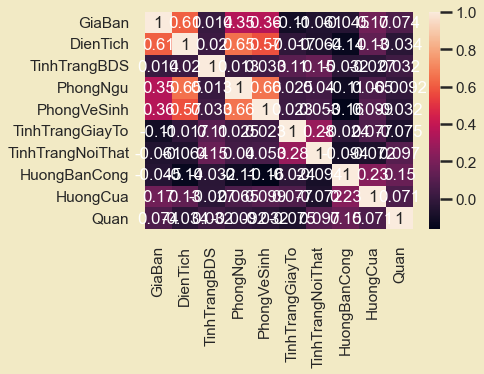

In [92]:
#vẽ heatmap thể hiện các correlation
sns.heatmap(correlations,annot=True);

- Các thuộc tính `TinhTrangGiayTo`, `TinhTrangNoiThat`, `HuongBanCong`, `HuongCua` có rất nhiều giá trị NaN, hơn phân nữa mẫu dữ liệu thu thập của các thuộc tính này đều mang giá trị NaN, chứng tỏ nhiều chủ bài đăng không quan tâm đến những thuộc tính này. Và đối với những mẫu có giá trị cụ thể cũng không mang một ý nghĩa tuyến tính nào với cột `GiaBan` do correlation rất thấp. Không lựa chọn những thuộc tính này cho việc mô hình hóa.
- Hai thuộc tính `Quan` và `TinhTrangBDS` có correlation cũng thấp, chứng tỏ không ảnh hưởng đến `GiaBan`.
- Các thuộc tính được giữ lại: `DienTich`, `PhongNgu`, `PhongVeSinh`. Và cột giá trị đầu ra `GiaBan`.

In [93]:
new_df=new_df[['GiaBan', 'DienTich', 'PhongNgu', 'PhongVeSinh']]
new_df.head()

,GiaBan,DienTich,PhongNgu,PhongVeSinh
0,2.35,66.0,2.0,2.0
1,3.42,71.0,2.0,2.0
2,2.40,56.0,2.0,NaN
3,7.50,107.0,3.0,NaN
4,3.10,75.0,2.0,2.0


<a id="2.4"></a>
### <span style='color:#2B9C15'>4. Xử lý các giá trị NaN</span>

🗺️ **Thổng kê phân bố của `PhongVeSinh`.**

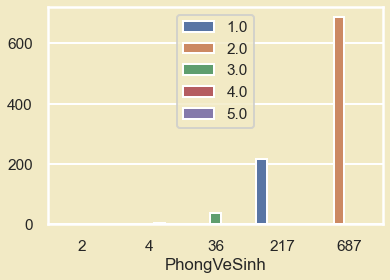

In [94]:
veSinh=new_df['PhongVeSinh'].value_counts()
sns.barplot(veSinh,veSinh.values,veSinh.index);

In [95]:
print(veSinh)

2.0    687
1.0    217
3.0     36
4.0      4
5.0      2
Name: PhongVeSinh, dtype: int64


💡 **Một số nhận xét và quyết định**

- Đối với bộ dữ liệu này mỗi cột có số lượng giá trị thiếu khá nhiều do đó việc bỏ đi các dòng chứa giá trị nan có thể gây ảnh hưởng lớn đến tính chính xác khi tiến hành học trên bộ dữ liệu do thiếu thông tin.
- Giải pháp có thể sử dụng là thay thế giá trị NaN bằng các giá trị đặc biệt của cột dữ liệu chẳng hạn: trung bình, trung vị, most_frequent, ....
- Nhóm sẽ sử dụng giá trị `most_frequent` để thay thế các giá trị NaN cho thuộc tính `PhongVeSinh`.

In [96]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
new_df['PhongVeSinh']=imputer.fit_transform(np.array(new_df['PhongVeSinh'].values).reshape(-1,1)).squeeze()
new_df[:13]

,GiaBan,DienTich,PhongNgu,PhongVeSinh
0,2.35,66.0,2.0,2.0
1,3.42,71.0,2.0,2.0
2,2.40,56.0,2.0,2.0
3,7.50,107.0,3.0,2.0
4,3.10,75.0,2.0,2.0
5,5.70,104.0,3.0,2.0
6,3.00,60.0,2.0,1.0
7,1.79,72.0,2.0,2.0
8,4.10,97.0,3.0,2.0
9,2.30,60.0,2.0,1.0


😊 Bây giờ thì đầu vào đã được tiền xử lý xong để phù hợp hơn cho việc áp dụng mô hình học máy.

<a id="3"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:newtimeroman;color: white; padding: 14px; line-height: 1;border-radius:10px">III. Xây dựng mô hình học máy</div>

<a id="3.1"></a>
### <span style='color:#2B9C15'>1. Hồi quy tuyến tính đơn biến (Univariable Linear Regression)</span>

💬 **Mô tả**

- Mục tiêu của hồi quy đơn biến là dự đoán giá trị của một biến phụ thuộc dựa vào một biến độc lập (hay còn gọi là thuộc tính).
- Trong bộ dữ liệu này chúng ta sẽ thử dự đoán giá bán của căn hộ chung cư (cột `GiaBan`) dựa vào thuộc tính diện tích của ngôi nhà (cột `DienTich`). **Ta cũng có thể thấy từ 'correlations' ở trên thì `DienTich` có mối tương quan cao nhất với `GiaBan` nên phù hợp nhất để thực hiện mô hình hồi quy tuyến tính đơn biến.**

**👉 Một vài ký hiệu**
- X: tập thuộc tính đầu vào.
- y: tập giá trị đầu ra.
- ($x^{(i)}$, $y^{(i)}$): mẫu huấn luyện thứ i trong bộ dữ liệu.

**🗺️ Sơ đồ mô hình**

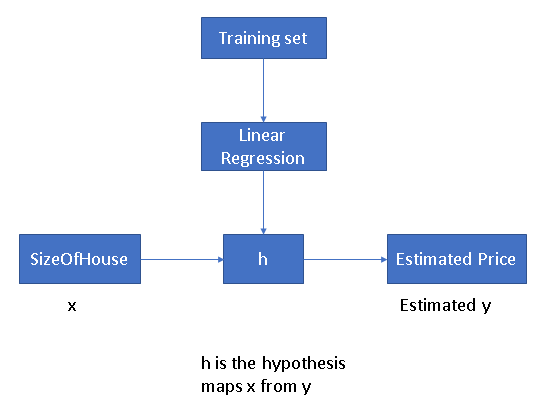

**🗺️ Cost Function**

- Ta có hypothesis là $h_{\theta}$(x): $\theta_{0}$ + $\theta_{1}$x với $\theta_{i}$ (i=0,1) là các tham số (parameters) của công thức hồi quy và $\theta_{0}$ còn được gọi là hệ số tự do.
- Tìm các $\theta_{i}$ để tạo ra đường thẳng phù hợp với dữ liệu (tạo ra $h_{\theta}$(x) càng gần y càng tốt).
- Để đánh giá xem hypothesis đã tốt hay chưa chúng ta xây dựng một hàm lỗi bình phương` sum square error` để tính toán độ sai lệch giữa giá trị dự đoán và giá trị thực tế.

**$$ J(\theta_{0}, \theta_{1}) = J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$**

Lúc này ta gọi $J(\theta)$ là 'Cost Function' với ý nghĩa là hàm chi phí đánh giá hiệu suất của hypothesis từ các tham số $\theta$.

Do càng gần y càng tốt nên giá trị của Cost Function càng nhỏ sẽ càng tốt.

🤔 Vậy làm thế nào để chọn được theta tốt cho hypothesis:
- Đầu tiên là khởi tạo theta với $\theta_{0}$=$\theta_{1}$=0 hoặc khởi tạo giá trị random cho các tham số đó.
- Phần lớn trường hợp Cost Function ban đầu sẽ có giá trị rất lớn do đó để giảm giá trị hàm chi phí thì cần có các giải pháp để tìm ra vector tham số theta phù hợp nhất cho hypothesis.
- Trong bài làm của nhóm sẽ sử dụng 2 cách là áp dụng thuật toán **Gradient Descent** và phương pháp **Normal Equation**.

**🗺️ Gradient Descent**

- Với hồi quy tuyền tính thì mục tiêu là cực tiểu hàm chi phí $$ J(\theta_{0}, \theta_{1}) = J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$ với $h_{\theta}(x)$ là đường thẳng tuyến tính.

- Các tham số $\theta_{j}$ sẽ là những giá trị mà chúng ta phải thay đổi để có thể tối ưu hóa Cost Function. Và trong thuật toán Gradient Descent cụ thể làm như sau:

**🗺️ Trong mỗi lần lặp cập nhật một cách đồng thời các tham số $\theta_{j}$ theo công thức**
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$$

Trong đó: alpha là 'learning rate' giúp việc học được tối ưu hơn.

**🗺️ Vectorization**

- Đối với các công thức trình bày bên trên sử dụng ký hiệu x là do minh họa cho một đầu vào. Nhưng khi làm việc với toàn bộ tập dữ liệu lớn thì việc lặp vòng lặp qua từng x trong bộ dữ liệu sẽ rất mất thời gian, do đó chúng ta sẽ tận dụng numpy để thực hiện các thao tác trên ma trận và truyền vào mô hình là những vector và ma trận. Bước này được gọi Vectorization (Ma trận hóa).
- Ký hiệu:
    + $\theta$: là vector tham số [$\theta_{0}$, $\theta_{1}$]
    + X là ma trận tất cả các mẫu đầu vào:
    [[1, $x^{1}$]
     [1, $x^{2}$]
     [...] 
     [1, $x^{m}$]] với m là kích thước bộ dữ liệu.
- 1 là được thêm vào mỗi đầu vào được gọi là bias.
- Hypothesis: $h_{\theta}$=X.$\theta$

**🛠 Cài đặt**

👉 Trực quan mối quan hệ giữa 2 biến `DienTich` và `GiaBan`:

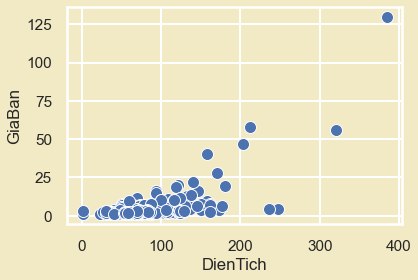

In [97]:
sns.scatterplot(data=new_df,x=new_df['DienTich'],y=new_df['GiaBan']);

👉 Chưa thấy rõ mối quan hệ có thể do chênh lệch giá trị giữa 2 thuộc tính. Có thể cần feature scaling về sau.

👉 Loại các outlier có diện tích lớn hơn 200.

In [98]:
rows=new_df[new_df['DienTich']>200]
new_df=new_df.drop(index=rows.index)

In [99]:
#chuyển dataframe sang nunpy array
new_df=new_df.to_numpy()

👉 Việc đầu tiên là lấy ra cột `GiaBan` và `DienTich`.

In [100]:
data=new_df[:,[0,1]]
data

array([[ 2.35, 66.  ],
       [ 3.42, 71.  ],
       [ 2.4 , 56.  ],
       ...,
       [ 2.2 , 83.5 ],
       [ 3.35, 69.  ],
       [ 1.68, 58.  ]])

In [101]:
X=data[:,1]
y=data[:,0]

In [102]:
#add bias unit.
X = np.stack([np.ones(len(X)), X], axis=1)

In [103]:
print(len(X), len(y))

1129 1129


👉 Bước tiếp theo là **Phân tách bộ dữ liệu thành 2 tập training set và test set**:

- Mục đích: Bất cứ khi nào chúng ta đào tạo một mô hình học máy, chúng ta không thể đào tạo mô hình đó trên một tập dữ liệu hoặc thậm chí chúng ta đào tạo nó trên một tập dữ liệu duy nhất thì chúng ta sẽ không thể đánh giá hiệu suất của mô hình của mình do tập dữ liệu đã được mô hình học thuộc lòng thì việc đánh giá sẽ luôn đạt tỉ lệ đúng rất cao và có thể lên đến 100% dẫn đến hiện tượng over fitting - Không tổng quát khi áp dụng vào dữ liệu thực tế.
- Ví dụ dễ hiểu là nếu bạn giải đề thi toán và được giáo viên cho một bộ các câu hỏi có thể ra thi, nếu bạn đã ôn rất kĩ những câu hỏi đó đến mức nhớ cách giải rõ ràng cho từng câu hỏi và sau đó khi đến ngày thi nếu giáo viên ra đề thi với các câu hỏi giống như trong bộ đề bạn đã ôn thì chắc chắn khả năng rất cao bạn sẽ được 10đ, do đó giáo viên không đánh giá chính xác nhất được khả năng tư duy giải toán hay hiểu vấn đề của học sinh mà chỉ đơn thuần là học thuộc lòng cách giải của từng câu hỏi. Giải pháp hiệu quả hơn cho việc đánh giá sẽ là phân chia bộ các câu hỏi ban đầu ra thành 2 phần là bộ câu hỏi cho học sinh ôn tập và bộ câu hỏi để ra đề thi khi đó buộc học sinh phải vận dụng, am hiểu những kiến thức trong quá trình ôn luyện vào giải đề thi. 
- Vì lý do đó, chúng ta chia dữ liệu nguồn của mình thành 2 tập training set và test set, nhiều bài viết cũng đề cập đến việc chia thành 3 tập là training, validation, và test set nhưng trong bài làm này nhóm sẽ chỉ chia thành 2 tập training và tets set.
- Kích thước mỗi tập như sau:
    + Size of Training set = 80% * (Size of Dataset).
    + Size of Test set = 20% * (Size of Dataset).

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
np.random.seed(13)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [106]:
print(len(X_train),len(y_train))

903 903


In [107]:
X_train[:5,:]

array([[  1. ,  40.8],
       [  1. ,  88. ],
       [  1. , 103. ],
       [  1. ,  57. ],
       [  1. ,  99. ]])

In [108]:
print(len(X_test),len(y_test))

226 226


In [109]:
print(X_train.shape)
print(y_train.shape)

(903, 2)
(903,)


**🗺️ Feature Scaling**

- Khi khoảng giá trị giữa 2 thuộc tính quá cách xa nhau thì việc mô hình hóa cũng như trực quan mối quan hệ có thể gặp khó khăn, do đó phải thực hiện kĩ thuật 'Feature Scaling' hay việt hóa là 'Co giãn thuộc tính'.
- Có 3 phương pháp feature scaling chính là:
    + Standardisation (Chính quy hóa): Làm cho tập dữ liệu có trung bình là 0 và độ lệch chuẩn là 1 và được áp dụng cho hầu hết các trường hợp cần feature scaling.
    + Normalisation (Tiêu chuẩn hóa): Làm cho các giá trị trong tập dữ liệu thuộc đoạn [0, 1] và được áp dụng nếu tập dữ liệu tuân theo phân phối chuẩn.
    + MinMax Scaler: Đưa các giá trị về khoảng giữa 2 giá trị min và max trong miền giá trị của thuộc tính, có thể là đoạn [-1, 0], [0, 1], [-1, 1],...
- Trong bài này nhóm chọn phương pháp Standardisation để scaling khoảng giá trị của thuộc tính về khoảng gần hơn với giá trị của tập y là 'GiaBan'.

In [110]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [111]:
X_train[:,1]=sc.fit_transform(X_train[:,1].reshape(-1,1)).squeeze()

In [112]:
X_train[:5,:]

array([[ 1.        , -1.25373557],
       [ 1.        ,  0.67157469],
       [ 1.        ,  1.28343176],
       [ 1.        , -0.59292993],
       [ 1.        ,  1.12026987]])

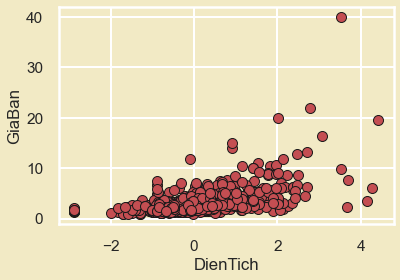

In [168]:
plt.plot(X_train[:,1],y_train,c='r',marker='o',ms=10,mec='k',ls='none');
plt.xlabel('DienTich')
plt.ylabel('GiaBan');

**🛠 Implementation Cost Function**

In [114]:
def computeCostFunction(X, y, theta):
    m = y.size  # number of training examples
    
    # init the cost function's value is equal to 0.
    J = 0
    
    # compute cost function J.
    J=(1/(2*m))*np.sum(np.square(np.dot(X,theta.reshape(-1,1))-y.reshape(-1,1)),axis=0)

    return J

**🛠 Implement Gradient Descent**

In [115]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = y.shape[0]  # number of training examples
    
    theta = theta.copy()
    
    J_records = [] # to track value of J throw each iteration.
    
    for i in range(num_iters):
        temp=theta.copy()
        for j in range(len(theta)):
            theta[j]=temp[j]-alpha*(1/m)*np.sum((np.dot(X,temp.reshape(-1,1))-y.reshape(-1,1)).squeeze()*X[:,j])
        
        # save the cost J in every iteration
        J_records.append(computeCostFunction(X, y, theta))
    
    return theta, J_records

In [116]:
# initialize fitting parameters
theta = np.random.rand(2)

# some gradient descent settings
iterations = 1000
alpha = 0.01 #learning rate

theta, J_history = gradientDescent(X_train ,y_train, theta, alpha, iterations)

In [117]:
theta

array([3.07176983, 1.31468626])

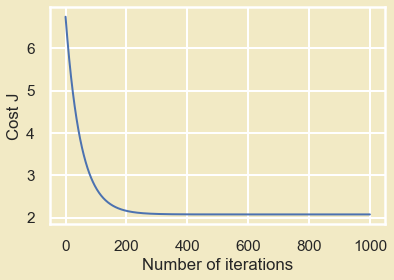

In [118]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J');

**👉 Vẽ đường thẳng tuyến tính tốt nhất với tập dữ liệu**

In [119]:
J_history[-1]

array([2.07344727])

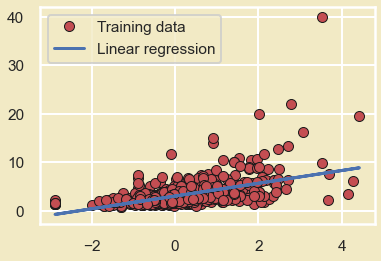

In [120]:
plt.plot(X_train[:,1],y_train,c='r',marker='o',ms=10,mec='k',ls='none');
plt.plot(X_train[:, 1], np.dot(X_train, theta), '-')
plt.legend(['Training data', 'Linear regression']);

In [121]:
X_test[:,1]=sc.transform(X_test[:,1].reshape(-1,1)).squeeze()

In [122]:
computeCostFunction(X_test, y_test, theta)

array([2.62837948])

In [123]:
predictions=np.dot(X_test,theta)
dic={'Predictions': list(predictions), 'Real Values':list(y_test)}
df=pd.DataFrame(dic)

👉 Trực quan việc so sánh giá trị dự đoán $h_{\theta}$(X) và y qua DataFrame 'df'.

In [124]:
df

,Predictions,Real Values
0,2.453133,2.075
1,2.185000,1.800
2,2.882146,1.800
3,5.000400,4.700
4,2.882146,2.500
...,...,...
221,4.330067,3.120
222,2.667640,2.900
223,2.185000,2.000
224,3.847427,3.000


👉 Ngoài việc tự cài đặt thì mô hình hồi quy tuyến tính cũng được xây dựng sẵn trong nhiều thư viện hỗ trợ của Python mà một trong số đó là Scikit Learn.

👉 Thực hiện so sánh kết quả được dự đoán giữa mô hình tự cài đặt của nhóm và của thư viện sklearn.

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [127]:
predictions2=regr.predict(X_test)

In [128]:
dic2={'Predictions by Implementation': list(predictions), 'Predictions by Sklearn':list(predictions2)}
comparison_df=pd.DataFrame(dic2)

In [129]:
comparison_df

,Predictions by Implementation,Predictions by Sklearn
0,2.453133,2.453246
1,2.185000,2.185106
2,2.882146,2.882270
3,5.000400,5.000578
4,2.882146,2.882270
...,...,...
221,4.330067,4.330228
222,2.667640,2.667758
223,2.185000,2.185106
224,3.847427,3.847575


👉 Như đã đề cập ở trên, nhóm sử dụng 2 cách để tìm ra theta tốt nhất cho hypothesis. Một là sử dụng Gradient Descent như đã đề cập ở trên, và cách thứ hai tiếp theo đây là sử dụng Normal Equation (Biểu thức chính quy).

**🗺️ Normal Equation**

Vector tham số $\theta$ sẽ được tính theo công thức sau: $$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$ với X và y lần lượt là ma trận đầu vào và vector của biến phụ thuộc như đã được đề cập ở mục **Vectorization** ở trên.

theta tốt nhất tìm được khi sử dụng gradient descent là array([3.07178971, 1.3146659 ]).

In [130]:
def normalEquation(X, y):
    theta = np.zeros(X.shape[1])
    
    theta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y.reshape(-1,1))
    theta=theta.squeeze()

    return theta

In [131]:
theta = normalEquation(X_train, y_train)
theta

array([3.07189877, 1.31471994])

👉 Nhận thấy sai số là rất ít giữa 2 phương pháp.

**🗺️ So sánh giữa Gradient Descent và Normal Equation**

| Gradient Descent | Normal Equation |
| :- | -: |
| Cần lựa chọn $\alpha$ phù hợp | Không cần lựa chọn $\alpha$ |
| Cần nhiều vòng lặp | Không cần nhiều vòng lặp |
| Làm việc tốt thậm chí với tập dữ liệu có kích thước rất lớn | Rất chậm với tập dữ liệu có kích thước rất lớn do cần tính $(X^{T}X)^{-1}$  |

<a id="3.2"></a>
### <span style='color:#2B9C15'>2. Hồi quy tuyến tính đa biến (Linear Regression with Multi Variables)</span>

💬 **Nhận xét**

- Với hồi quy tuyến tính đơn biến là mô hình hồi quy đơn giản có thể được áp dụng, tuy nhiên một vấn đề có thể dễ dàng nhận thấy là trong một tập dữ liệu với rất nhiều thuộc tính (biến) đầu vào và một biến đầu ra thì việc lựa chọn ra một thuộc tính trong số các thuộc tính đầu vào để xây dựng hypothesis cho đường hồi quy tuyến tính là việc không dễ dàng.
- Hypothesis chỉ có thể được xây dựng gần với giá trị thật của biến đầu ra nhất khi thuộc tính được chọn phải có mối quan hệ tuyến tính thật sự với biến y và quan trọng hơn hết nó có vai trò ảnh hưởng phải lớn đến giá trị của biến y.
- Đối vối bài toán dự đoán giá bán của căn hộ/chung cư thì có thể chấp nhận việc thuộc tính diện tích ngôi nhà là có vai trò ảnh hưởng lớn đến giá nhà nhưng vẫn có khả năng số phòng ngủ hay số phòng vệ sinh sẽ cũng ảnh hưởng nhiều đến giá bán.
- Hay một bài toán khó hơn là dự đoán giá bán xe ô tô dự vào các thuộc tính khác như dung tich xilanh, số cửa, động cơ,... thì việc lựa chọn ra một thuộc tính cho việc hồi quy đơn biến là khó khăn hơn nhiều do mỗi một thuộc tính đều đóng góp một ít tầm ảnh hưởng vào giá bán của xe ô tô đó.
- Khi đó giải pháp là lựa chọn tất cả để xây dựng hypothesis cho mô hình hồi quy.

**💬 Vấn đề gặp phải**
- Khi dùng nhiều biến để xây dựng hypothesis thì hypothesis sẽ rất phức tạp, chẳng hạn như một đầu vào x với n thuộc tính ($x_{1}, x_{2}, ..., x_{n}$) được chọn để xây dựng hypothesis: $$h_{\theta}(x) = \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + ... + \theta_{n}x_{n}$$Điều này sẽ có thể tạo nên một đường không phải dạng đường thẳng mà nó là một dạng đường ngoằn ngòe phức tạp nào đó, có thể khớp rất tốt với tập dữ liệu huấn luyện nhưng khi áp dụng vào thực tế thì không, đây được gọi là vấn đề over fitting.
- Ngoài ra, có thể kể đến một trường hợp rất đáng xem xét đó là đường tuyến tính không còn phù hợp với bộ dữ liệu, khi đó ta phải áp dụng 'Hồi quy đa thức' (Polynomial Regression)' bằng cách tăng bậc của hypothesis lên lớn hơn 1 để có thể khớp hơn với bộ dữ liệu. Tuy nhiên việc lựa chọn bậc cho hồi quy đa thức liên đến các thuật toán lựa chọn mô hình (Model Selection Algorithms) và nhóm sẽ không trình bày phần này trong đồ án lần này.

Quay trở lại với vấn đề một hypothesis dạng tuyến tính quá phức tạp vì có quá nhiều tham số thì một trong những cách được đề xuất để khắc phục vấn đề này là **Regularization** hay việt hóa là 'Chính quy hóa'. Nội dung này cũng là nội dung sẽ được nhóm trình bày trong phần tiếp theo.

Thay vì chọn hết tất cả thuộc tính theo suy nghĩ chủ quan ban đầu thì sau khi có được các hệ số tương quan giữa các thuộc tính và biến đầu ra, nhóm tiền hành xây dựng mô hình hồi quy tuyến tính đa biến với 3 thuộc tính có liên quan cao nhất đến `GiaBan` là `DienTich`, `PhongNgu`, `PhongVeSinh`.

**🗺️ Regularization**
- Ý tưởng là: thêm vào cost function một đại lượng nữa là **tổng các tích của một hằng số $\lambda$ với $\theta_{j}$ với j=[1,n] nếu x có n thuộc tính.**
- Đại lượng này tác động đến Cost Function như sau: $$J(\theta) = \frac{1}{2m}[ \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 + \lambda\sum_{j=1}^n \left( \theta_{j}\right)^2]$$
    + Cùng nhớ lại mục tiêu của hồi quy tuyến tính là minimize hàm Cost Function do đó khi thêm một đại lượng là $\lambda\sum_{j=1}^n \left( \theta_{j}\right)^2$ thì để cho có thể minimize được Cost Function bắt buộc các tham số $\theta_{j}$ phải nhỏ và ta gọi việc 'ép buộc' này là phạt (penalize) các tham số $\theta$.
    + Tuy nhiên nhìn vào công thức của đại lượng được thêm vào bạn chắc chắn sẽ chú ý đến hằng số $\lambda$, vậy việc chọn $\lambda$ ảnh hưởng như nào đến quá trình Regularization.
        - Nếu chúng ta thiết lập $\lambda$ rất nhỏ thì việc thực hiện regularization sẽ không còn ý nghĩa nữa, còn nếu như thiết lập $\lambda$ rất lớn thì việc penalize các tham số $\theta$ là rất nặng dẫn đến $\theta_{j}$ (j=[1, n]) sẽ xấp xỉ 0 và lúc này hypothesis trở thành một hàm hằng $h_{\theta}$(x) = $\theta_{0}$ dẫn đến hiện tượng Underfitting.
    + Để dễ dàng hơn nhóm sẽ chọn $\lambda$=1 cho quá trình này.

**🗺️ Gradient Descent cho Regularization trên hồi quy tuyến tính**

$\theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_0^{(i)}$

$\theta_j = \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)}$ với j=[1, n] nếu x có n thuộc tính.

***Tất nhiên việc cập nhật các $\theta_{j}$ cũng phải diễn ra một cách đồng thời***.

**🗺️ Normal Equation với Regularization**
$$\theta = \left( X^T X + \lambda A\right)^{-1} X^T\vec{y}$$ với A là ma trận chứa các giá trị 0 và chỉ có các giá trị trên đường chéo chính có giá trị là 1 nhưng trừ phần tử ở vị trí [0, 0] cũng bằng 0.

👉 Việc đầu tiên cũng sẽ là lấy ra thuộc tính và biến đầu ra từ tập dữ liệu

In [132]:
data2=new_df[:,:]
data2

array([[ 2.35, 66.  ,  2.  ,  2.  ],
       [ 3.42, 71.  ,  2.  ,  2.  ],
       [ 2.4 , 56.  ,  2.  ,  2.  ],
       ...,
       [ 2.2 , 83.5 ,  2.  ,  2.  ],
       [ 3.35, 69.  ,  2.  ,  2.  ],
       [ 1.68, 58.  ,  2.  ,  2.  ]])

In [133]:
X2=data2[:,1:]
y2=data[:,0]

**🗺️ PCA giảm chiều dữ liệu**
- Để có thể minh họa mối quan hệ giữa các thuộc tính và biến đầu ra, ta phải giảm chiều dữ liệu của tập thuộc tính.
- Một phương pháp hữu ích và được sklearn hỗ trợ sẵn đó là PCA.

In [134]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
X2_pca=pca.fit_transform(X2)

In [135]:
X2_pca

array([[ -5.22606272],
       [ -0.2267801 ],
       [-15.22462796],
       ...,
       [ 12.27142645],
       [ -2.22649315],
       [-13.22491491]])

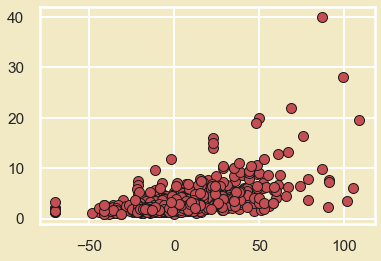

In [136]:
plt.plot(X2_pca.squeeze(),y2,c='r',marker='o',ms=10,mec='k',ls='none');

**🛠 Tiến hành cài đặt hồi quy tuyến tính đa biến**

In [137]:
#add bias unit
X2 = np.concatenate([np.ones((len(X2), 1)), X2], axis=1)
X2

array([[ 1. , 66. ,  2. ,  2. ],
       [ 1. , 71. ,  2. ,  2. ],
       [ 1. , 56. ,  2. ,  2. ],
       ...,
       [ 1. , 83.5,  2. ,  2. ],
       [ 1. , 69. ,  2. ,  2. ],
       [ 1. , 58. ,  2. ,  2. ]])

In [138]:
#train_test_split
np.random.seed(13)
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.2)

In [139]:
print(len(X2_train), len(X2_test))

903 226


In [140]:
X2_train

array([[  1. ,  40.8,   1. ,   1. ],
       [  1. ,  88. ,   2. ,   2. ],
       [  1. , 103. ,   3. ,   2. ],
       ...,
       [  1. ,  70. ,   2. ,   2. ],
       [  1. ,  82. ,   2. ,   2. ],
       [  1. ,  55. ,   2. ,   2. ]])

In [141]:
#feature scaling for 'DienTich' attributes.
sc2=StandardScaler()
X2_train[:,[1]]=sc2.fit_transform(X2_train[:,[1]])

In [142]:
X2_train

array([[ 1.        , -1.25373557,  1.        ,  1.        ],
       [ 1.        ,  0.67157469,  2.        ,  2.        ],
       [ 1.        ,  1.28343176,  3.        ,  2.        ],
       ...,
       [ 1.        , -0.0626538 ,  2.        ,  2.        ],
       [ 1.        ,  0.42683186,  2.        ,  2.        ],
       [ 1.        , -0.67451088,  2.        ,  2.        ]])

In [143]:
X2_train.shape

(903, 4)

**🛠 Implementation Cost Function with Regularization**

In [144]:
def computeCostFunctionReg(X, y, theta, lambda_):
    m = y.size  # number of training examples
    
    # init the cost function's value is equal to 0.
    J = 0
    
    # compute cost function J.
    theta_to_compute=theta[1:]
    J=(1/(2*m))*(np.sum(np.square(np.dot(X,theta.reshape(-1,1))-y.reshape(-1,1)),axis=0) + lambda_*np.sum(np.square(theta_to_compute)))

    return J

**🛠 Implementation Gradient Descent with Regularization**

In [145]:
def gradientDescentReg(X,y,theta,alpha,lambda_,num_iters):
    m = y.shape[0]  # number of training examples
    
    theta = theta.copy()
    
    J_records = [] # to track value of J throw each iteration.
    
    for i in range(num_iters):
        temp=theta.copy()
        for j in range(len(theta)):
            if j==0:
                theta[0]=temp[0]-alpha*(1/m)*np.sum((np.dot(X,temp.reshape(-1,1))-y.reshape(-1,1)).squeeze())
            else:
                theta[j]=temp[j]*(1-(alpha*(lambda_/m)))-alpha*(1/m)*np.sum((np.dot(X,temp.reshape(-1,1))-y.reshape(-1,1)).squeeze()*X[:,j])
        
        # save the cost J in every iteration
        J_records.append(computeCostFunctionReg(X, y, theta, lambda_))
    
    return theta, J_records

In [146]:
# initialize fitting parameters
theta2 = np.random.rand(X2_train.shape[1])
# some gradient descent settings
iterations2 = 10000
alpha2 = 0.01 #learning rate
lambda_=1

theta2, J_history2 = gradientDescentReg(X2_train ,y2_train, theta2, alpha2, lambda_, iterations2)

In [147]:
theta2

array([ 2.50963541,  1.20089063,  0.42935034, -0.18216281])

Text(0, 0.5, 'Cost J')

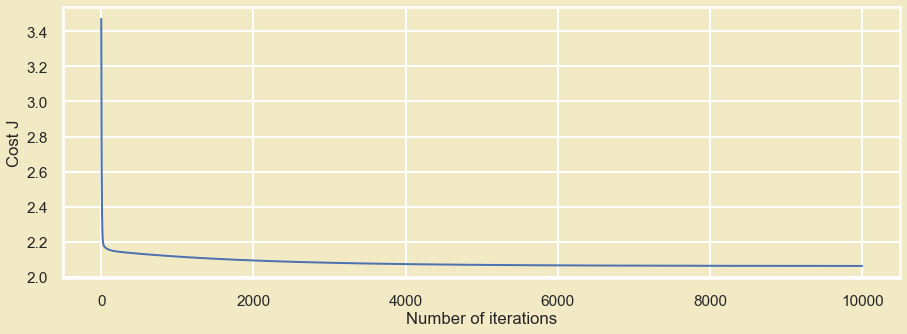

In [148]:
plt.figure(figsize=(15,5))
plt.plot(np.arange(len(J_history2)), J_history2, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J');

In [149]:
J_history2[-1]

array([2.06230915])

In [150]:
X2_test[:,[1]]=sc2.transform(X2_test[:,[1]])

In [151]:
computeCostFunctionReg(X2_test,y2_test,theta2,lambda_)

array([2.63925256])

👉 Giá trị của Cost Function khi kiểm nghiệm trên tập Test là 2.639

**🛠 Implementation Normal Equation with Regularization**

In [152]:
def normalEquationReg(X, y, lambda_, A):
    theta = np.zeros(X.shape[1])
    
    theta=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X) + lambda_*A),X.T),y.reshape(-1,1))
    theta=theta.squeeze()

    return theta

In [153]:
A=np.diag(np.full(X2_train.shape[1],1))
A[0,0]=0
A

array([[0, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [154]:
theta2_eqn = normalEquationReg(X2_train, y2_train, lambda_, A)
theta2_eqn

array([ 2.68275386,  1.22618977,  0.38615308, -0.22465913])

In [155]:
computeCostFunctionReg(X2_test,y2_test,theta2_eqn,lambda_)

array([2.63380934])

👉 Giá trị của Cost Function khi kiểm nghiệm trên tập Test là 2.634

👉 Trong trường hợp này: **Normal Equation** cho kết quả hơi tốt hơn so với **Gradient Descent**.

In [156]:
percent = np.abs((np.dot(X2_test,theta2) - y2_test)/y2_test)
percent = percent*100

In [157]:
statistical = {'Gia du doan':np.dot(X2_test,theta2),
        'Gia thuc':y2_test,
       '% sai lech': percent}
statistical_df = pd.DataFrame(statistical)
statistical_df

,Gia du doan,Gia thuc,% sai lech
0,2.438921,2.075,17.538369
1,1.946809,1.800,8.156064
2,2.830800,1.800,57.266684
3,5.195054,4.700,10.533064
4,2.830800,2.500,13.232013
...,...,...,...
221,4.153392,3.120,33.121554
222,2.634861,2.900,9.142733
223,2.376159,2.000,18.807974
224,3.959716,3.000,31.990532


In [158]:
statistical_df['% sai lech'].describe()

count    226.000000
mean      42.611577
std       34.197188
min        0.163634
25%       15.961642
50%       34.631247
75%       62.106314
max      149.883942
Name: % sai lech, dtype: float64

💬 **Nhận xét:**
- Từ độ sai lệch cho thấy mô hình đưa ra dự đoán có thể chấp nhận được cho những căn hộ có giá bán từ thấp đến trung bình, những căn hộ có giá bán cao có độ sai lệch quá nhiều cho thấy những thông tin từ dữ liệu đầu vào không còn đúng khi dùng để đánh giá giá bán cho những căn hộ này. Có thể tính tới các yêu tố ngoại cảnh như chất lượng nội thất, chất lượng vật liệu xây dựng công trình, nhà thầu xây dựng, hay ý kiến chủ quan của người bán....

<a id="3.3"></a>
### <span style='color:#2B9C15'>3. Đánh giá mô hình (Evaluation)</span>

🗺️  Dùng $R^{2} Score$ để đánh giá độ phù hợp của mô hình. Điểm số tốt nhất có thể có là 1.0 và có thể có giá trị âm (mô hình cho ra kết quả quá tệ).

🗺️ $R^{2} Score$ sẽ cho biết tỷ lệ các điểm dữ liệu nằm gần đường tuyến tính như thế nào. Nếu càng nhiều điểm dữ liệu trong bộ dữ liệu nằm gần đường tuyến tình thì điểm càng cao và ngược lại. 

**🗺️ $R^{2} Score$:**

$R^{2}$ được định nghĩa bằng công thức: $$(1 - \frac{u}{v})$$ với: 
- u = sum( (y_true - y_pred)^2 )

- v = sum( (y_true - y_true.mean( ) )^2)

**🛠 Implementation $R^{2} Score$:**

In [159]:
def r2Score(y_true, y_pred):
    u = np.sum(np.square(y_true - y_pred))
    v = np.sum(np.square(y_true - np.mean(y_true)))
    return 1 - (u/v)

💬 Đánh giá mô hình hồi quy tuyến tính đơn biến.

In [160]:
print(r2Score(y_test.round(2),predictions))
#R2 score by sklearn.
print(regr.score(X_test,y_test))

0.3175430095921882
0.3175269542389503


💬 Đánh giá mô hình hồi quy tuyến tính đa biến.

In [161]:
regr2 = LinearRegression()
regr2.fit(X2_train, y2_train)

LinearRegression()

In [162]:
print(r2Score(y2_test.round(2), np.dot(X2_test,theta2).round(2)))
#R2 score from sklearn.
print(regr2.score(X2_test,y2_test))

0.3155878692096513
0.31717337828410985


💬 **Nhận xét:**
- Từ $R^{2} Score$ cho thấy các nhận xét như sau:
    + Bộ dữ liệu có mức phù hợp thấp với mô hình hồi quy tuyến tính.
    + Có thể do số lượng dự liệu chưa đủ lớn ảnh hưởng đến việc học tập của mô hình.
    + Giá của những ngôi nhà giá cao chưa phù hợp với thông tin đầu vào.

<a id="3.4"></a>
### <span style='color:#2B9C15'>4. Hồi quy đa thức (Polynomial Regression) đơn giản với đơn biến</span>

**🗺️ Hồi quy đa thức:**

- Là việc sử dụng một hypothesis có bậc lớn hơn 1 để biểu diễn các mối quan hệ phi tuyến tính.
- Trong thuật toán hồi quy tuyến tính, nó chỉ hoạt động tốt khi mối quan hệ trong bộ dữ liệu là tuyến tính. Nhưng giả sử nếu chúng ta có dữ liệu phi tuyến tính thì hồi quy tuyến tính sẽ không thể vẽ một đường phù hợp nhất và nó sẽ thất bại trong việc khớp dữ liệu cũng như dự đoán sau này.
- Khi thực hiện hồi quy đa thức đơn biến thì hypothesis sẽ có dạng: $$h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^{2} + ... + \theta_{n}x^{n}$$ với bậc là n.

**💬 Nhận xét:**
- Nhóm sẽ sử dụng thuộc tính `DienTich` để thực hiện hồi quy đa thức với bậc là 2 để xem liệu có thể tăng hiệu suất dự đoán so với hồi quy tuyến tính.
- Trong phần này nhóm sẽ không tự cài đặt mà sẽ dùng thư viện sklearn để hỗ trợ.

In [163]:
X3=data[:,1]
y3=data[:,0]

In [164]:
np.random.seed(13)
X3_train,X3_test,y3_train,y3_test=train_test_split(X3,y3,test_size=0.2)

In [165]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
X3_train_trans = poly.fit_transform(X3_train.reshape(-1,1))
X3_test_trans = poly.transform(X3_test.reshape(-1,1))

In [166]:
lr = LinearRegression()
lr.fit(X3_train_trans, y3_train)
y_pred = lr.predict(X3_test_trans)
lr.score(X3_test_trans,y3_test)

0.4323398846052242

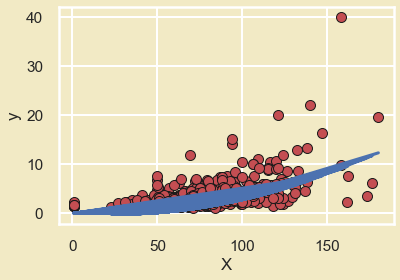

In [167]:
plt.plot(X3_train,y3_train,c='r',marker='o',ms=10,mec='k',ls='none');
plt.plot(X3_train, np.dot(X3_train_trans,lr.coef_.reshape(-1,1)), '-')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

**💬 Nhận xét:**
- $R^{2} score$ tăng lên nhưng mô hình vẫn không khả quan.
- Điểm số tăng lên là do sai lệch ở mỗi điểm dữ liệu dự đoán và điểm dữ liệu thật giảm đi so với hồi quy tuyến tính nhưng sẽ ít đi các điểm gần đúng hơn so với hồi quy tuyến tính.

<a id="3.5"></a>
### <span style='color:#2B9C15'>5. Tổng kết</span>

- Đối với hồi quy tuyến tính: Các thuộc tính đầu vào có thể có ảnh hưởng đến 31% giá bán của căn hộ.
- Mô hình có thể dự đoán giá của các căn hộ có giá bán từ thấp đến trung bình, nhưng không dự đoán tốt với các căn hộ có giá bán cao.
- Những yếu tố có thể ảnh hưởng đến mô hình hồi quy:
    + Còn nhiều yếu tố ngoại cảnh ảnh hưởng đến giá bán như chất lượng xây dựng, chất lượng nội thất, giá thầu,...
    + Có thể nhiều chủ căn hộ đăng giá theo cảm tính, khi nhìn vao bộ dữ liệu có rất nhiều điểm dữ liệu xếp chồng lên nhau, điều này chứng tỏ với những kích thước gần nhau nhưng giá rất khác biệt nhau.

<div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">HẾT PHẦN 2</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">| Thank you for watching! |</div>